<a href="https://colab.research.google.com/github/vadim13213/image_processing/blob/main/%D0%9F%D1%80%D0%BE%D0%B5%D0%BA%D1%82%D0%BD%D0%B0%D1%8F%20%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0%20%E2%84%962(1).%20%D0%A1%D0%B6%D0%B0%D1%82%D0%B8%D0%B5%20%D0%B8%D0%B7%D0%BE%D0%B1%D1%80%D0%B0%D0%B6%D0%B5%D0%BD%D0%B8%D0%B8%CC%86%2C%20%D0%B8%D1%81%D0%BF%D0%BE%D0%BB%D1%8C%D0%B7%D1%83%D1%8F%20%D0%B0%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC%20%D0%BA%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D0%B8%20%D0%BC%D0%B5%D1%82%D0%BE%D0%B4%D0%BE%D0%BC%20%D0%9A-%D1%81%D1%80%D0%B5%D0%B4%D0%BD%D0%B8%D1%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Задание 1.
1.	Сжать исходное изображение используя метод K-means, встроенный в библиотеку Scikit-learn при следующих вариантах количества цветов: 2, 3, 4, 8, 16, 32, 64, 128, 256. Сохранить получившиеся изображения в отдельную папку (Scikit Compressor) и продемонстрировать их в отчёте.

In [5]:
import os
import cv2
import numpy as np
from sklearn.cluster import KMeans
from imutils import resize
import os
import time
import pandas as pd
import matplotlib.pyplot as plt

In [2]:

def compress_image_with_kmeans(image_path, n_colors, output_folder="Scikit_Compressor"):

    image = cv2.imread(image_path)
    image_reshaped = image.reshape(-1, 3) / 255.0

    scikit_results = []

    for k in n_colors:
        start_time = time.time()
        kmeans = KMeans(n_clusters=k, random_state=0).fit(image_reshaped)
        compressed_colors = kmeans.cluster_centers_[kmeans.labels_]
        compressed_image = (compressed_colors * 255).astype(np.uint8).reshape(image.shape)

        output_path = f"{output_folder}/compressed_{k}_colors.jpg"
        cv2.imwrite(output_path, compressed_image)

        execution_time = time.time() - start_time
        file_size = os.path.getsize(output_path)

image_path = '/content/volga.png'
output_folder = 'Scikit_Compressor'
n_colors = [2, 3, 4, 8, 16, 32, 64, 128, 256]

compress_image_with_kmeans(image_path, n_colors, output_folder)


In [ ]:

def compress_image_with_kmeans(image_path, n_colors, output_folder="Scikit_Compressor"):

    image = cv2.imread(image_path)
    image_reshaped = image.reshape(-1, 3) / 255.0

    scikit_results = []

    for k in n_colors:
        start_time = time.time()

        kmeans = KMeans(n_clusters=k, random_state=0).fit(image_reshaped)
        compressed_colors = kmeans.cluster_centers_[kmeans.labels_]
        compressed_image = (compressed_colors * 255).astype(np.uint8).reshape(image.shape)

        output_path = f"{output_folder}/compressed_{k}_colors.jpg"
        cv2.imwrite(output_path, compressed_image)

        execution_time = time.time() - start_time
        file_size = os.path.getsize(output_path)



image_path = '/content/volga.png'
output_folder = 'Scikit_Compressor'
n_colors = [2, 3, 4, 8, 16, 32, 64, 128, 256]

compress_image_with_kmeans(image_path, n_colors, output_folder)


Задание 2.
2.	Используя алгоритм, дающий возможность вручную выбрать количество итераций, подобрать оптимальное количество итераций по скорости выполнения и качеству сжатого изображения. После этого также следует произвести сжатие изображения с указанными выше количествами цветов. Сохранить получившиеся изображения в отдельную папку (K-means Compressor) и продемонстрировать их в отчёте.

In [3]:

def compress_image_with_iterations(image_path, n_colors, max_iters, output_folder="K-means_Compressor"):
    image = cv2.imread(image_path)
    image_reshaped = image.reshape(-1, 3) / 255.0

    kmeans_results = []

    for k in n_colors:

        start_time = time.time()

        kmeans = KMeans(n_clusters=k, max_iter=max_iters, random_state=0).fit(image_reshaped)
        compressed_colors = kmeans.cluster_centers_[kmeans.labels_]
        compressed_image = (compressed_colors * 255).astype(np.uint8).reshape(image.shape)

        output_path = f"{output_folder}/compressed_{k}_colors_{max_iters}_iters.jpg"
        cv2.imwrite(output_path, compressed_image)

        execution_time = time.time() - start_time
        file_size = os.path.getsize(output_path)




image_path = '/content/volga.png'
output_folder = 'K-means_Compressor'
n_colors = [2, 3, 4, 8, 16, 32, 64, 128, 256]
max_iters = 15

compress_image_with_iterations(image_path, n_colors, max_iters, output_folder)


Задание 3.
3.	Составить сравнительную таблицу со следующими данными: количество цветов, вес сжатого изображения по алгоритму из п.1, время выполнения программы для сжатия изображения по алгоритму из п.1, вес сжатого изображения по алгоритму из п.2., время выполнения программы для сжатия изображения по алгоритму из п.2

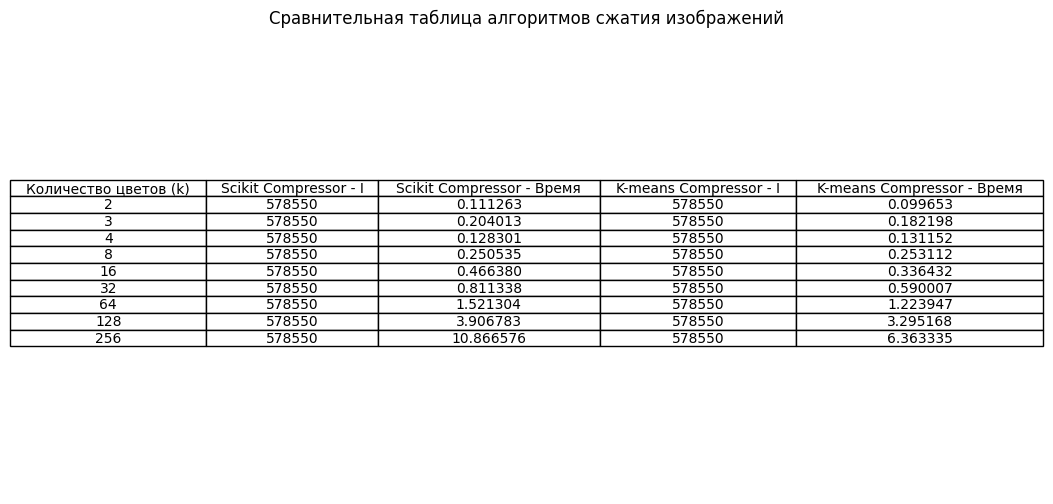

Задание 4.
4.	Подобрать оптимальное количество цветов и итераций для сжатия изображения без наглядного ухудшения качества изображения. Привести пример на пяти разных изображениях


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (36) found smaller than n_clusters (64). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (36) found smaller than n_clusters (128). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (42) found smaller than n_clusters (64). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (42) found smaller than n_clusters (128). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


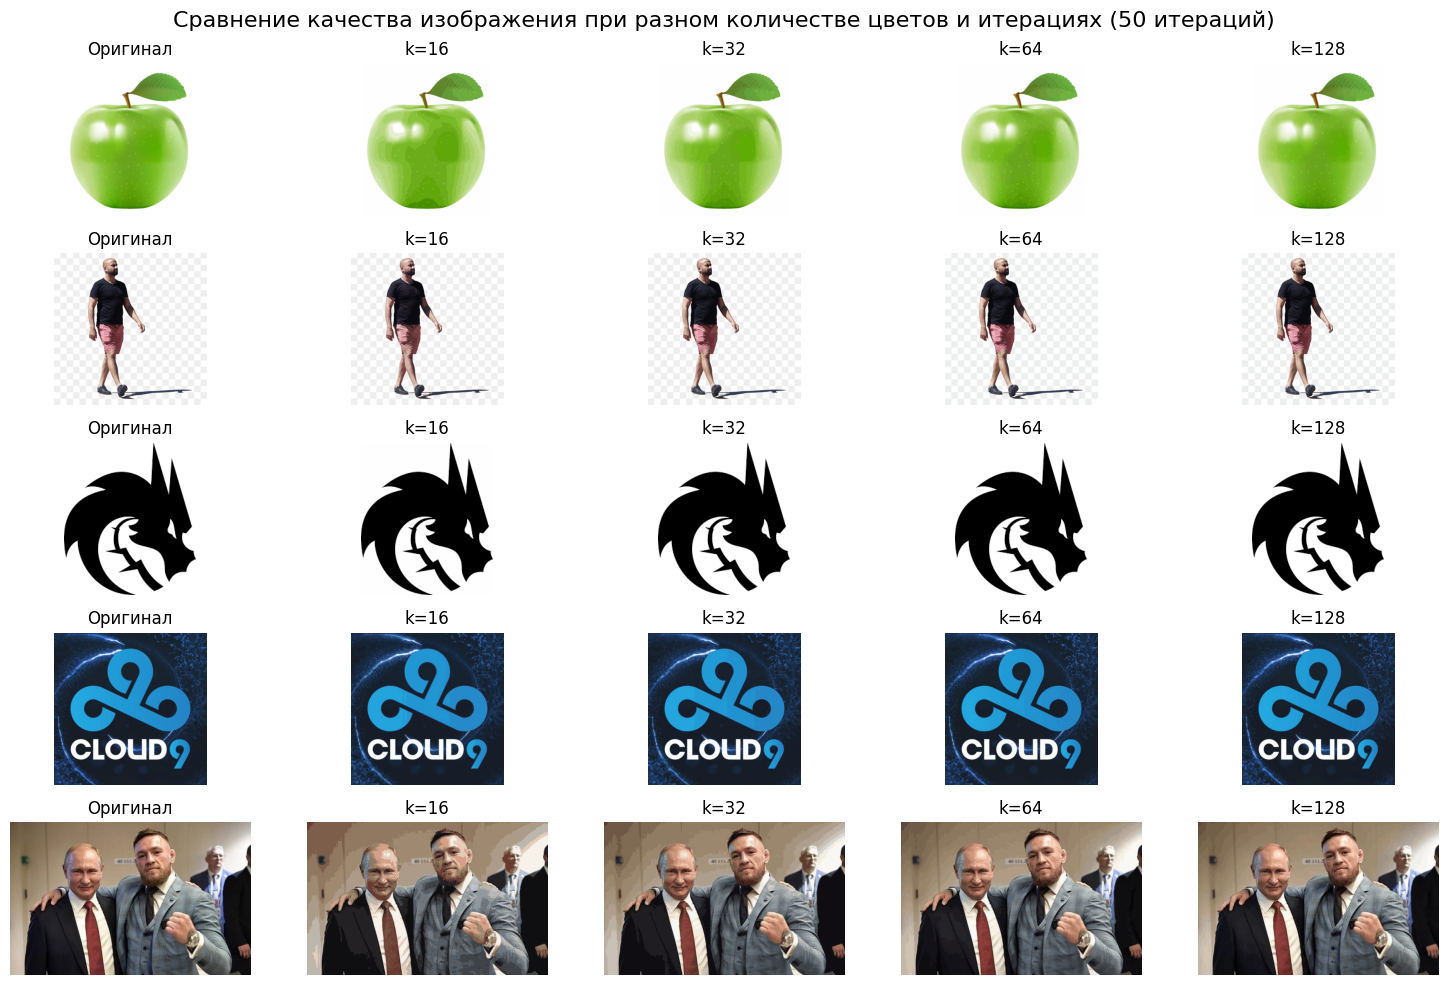

In [6]:
def compress_image_kmeans(image, k, max_iters=100):
    """Сжимает изображение с использованием K-means."""
    image_reshaped = image.reshape(-1, 3)

    kmeans = KMeans(n_clusters=k, max_iter=max_iters, random_state=0)
    labels = kmeans.fit_predict(image_reshaped)
    compressed_image = kmeans.cluster_centers_[labels].reshape(image.shape)
    return compressed_image.astype(np.uint8)

def plot_compression_results(images, k_values, max_iters):
    """Выводит результаты сжатия для различных параметров k и max_iters."""
    fig, axs = plt.subplots(len(images), len(k_values) + 1, figsize=(15, 10))

    for i, image in enumerate(images):

        axs[i, 0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        axs[i, 0].set_title("Оригинал")
        axs[i, 0].axis('off')

        for j, k in enumerate(k_values):
            compressed_img = compress_image_kmeans(image, k, max_iters)
            axs[i, j + 1].imshow(cv2.cvtColor(compressed_img, cv2.COLOR_BGR2RGB))
            axs[i, j + 1].set_title(f"k={k}")
            axs[i, j + 1].axis('off')

    plt.suptitle(f"Сравнение качества изображения при разном количестве цветов и итерациях ({max_iters} итераций)", fontsize=16)
    plt.tight_layout()
    plt.show()

k_values = [16, 32, 64, 128]  # количество цветов
max_iters = 50  # количество итераций

images = [
    cv2.imread('/content/apple.png'),
    cv2.imread('/content/fwver.png'),
    cv2.imread('/content/inv.png'),
    cv2.imread('/content/klub-cloud9-iz-ssha-podpisal-rossijskij-sostav-gambit-po-cs-go-igrokov-vyvezut-iz-rossii_16508024591.png'),
    cv2.imread('/content/volga.png')
]

plot_compression_results(images, k_values, max_iters)
